In [873]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import chi2_contingency
from datetime import datetime

In [874]:
employers = pd.read_csv('Attrition_dataset.csv', sep=';')
cities = pd.read_csv('Cities_map.csv', sep=';')

In [875]:
print(employers.head())

   Emp_ID      MMM.YY  Age        Salary LastWorkingDate  Designation  \
0       1  01.01.2016   28  57387,00 USD             NaN            1   
1       1  01.02.2016   28  57387,00 USD             NaN            1   
2       1  01.03.2016   28  57387,00 USD      11.03.2016            1   
3       2  01.11.2017   31  67016,00 USD             NaN            2   
4       2  01.12.2017   31  67016,00 USD             NaN            2   

   Total.Business.Value  Quarterly.Rating Gender City Education_Level  \
0               2381060                 2   Male  C23          MASTER   
1               -665480                 2   Male  C23          MASTER   
2                     0                 2   Male  C23          MASTER   
3                     0                 1   Male   C7          Master   
4                     0                 1   Male   C7          Master   

  Dateofjoining  Joining.Designation  
0    24.12.2015                    1  
1    24.12.2015                    1  
2    

In [876]:
print(cities.head())

  City_ID  City_Name
0     C01     Austin
1     C02     Boston
2     C03  Charlotte
3     C04    Chicago
4     C05   Columbus


In [877]:
print(employers.describe(include='all'))

              Emp_ID      MMM.YY           Age        Salary LastWorkingDate  \
count   19190.000000       19190  19190.000000         19190            1628   
unique           NaN          24           NaN          2383             493   
top              NaN  01.01.2016           NaN  48747,00 USD      29.07.2017   
freq             NaN        1025           NaN            57              71   
mean     1416.239083         NaN     34.649192           NaN             NaN   
std       810.866259         NaN      6.264600           NaN             NaN   
min         1.000000         NaN     21.000000           NaN             NaN   
25%       712.000000         NaN     30.000000           NaN             NaN   
50%      1417.500000         NaN     34.000000           NaN             NaN   
75%      2139.000000         NaN     39.000000           NaN             NaN   
max      2788.000000         NaN     58.000000           NaN             NaN   

         Designation  Total.Business.Va

In [878]:
print(employers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19190 entries, 0 to 19189
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Emp_ID                19190 non-null  int64 
 1   MMM.YY                19190 non-null  object
 2   Age                   19190 non-null  int64 
 3   Salary                19190 non-null  object
 4   LastWorkingDate       1628 non-null   object
 5   Designation           19190 non-null  int64 
 6   Total.Business.Value  19190 non-null  int64 
 7   Quarterly.Rating      19190 non-null  int64 
 8   Gender                19190 non-null  object
 9   City                  19190 non-null  object
 10  Education_Level       19190 non-null  object
 11  Dateofjoining         19190 non-null  object
 12  Joining.Designation   19190 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 1.9+ MB
None


## Data cleaning

### Renaming columns

In [879]:
employers.rename(columns={
    'Emp_ID': 'ID',
    'MMM.YY': 'Month',
    'LastWorkingDate': 'Last Working Date',
    'Total.Business.Value': 'Total Business Value',
    'Quarterly.Rating': 'Quarterly Rating',
    'Education_Level': 'Education Level',
    'Dateofjoining': 'Date of Joining',
    'Joining.Designation':'Joining Designation'
}, inplace=True)

### Solving mistakes in 'Education Level' naming

In [880]:
employers['Education Level'] = employers['Education Level'].apply(lambda x: 'Master' if x[0]== 'M' else ('College' if x[0]=='C' else 'Bachelor'))

In [881]:
employers['Salary'] = employers['Salary'].apply(lambda x: float(x.strip(' USD').replace(',','.')))

print(employers['Salary'])

0         57387.0
1         57387.0
2         57387.0
3         67016.0
4         67016.0
           ...   
19185     38619.0
19186     62292.0
19187     85688.0
19188    111507.0
19189    102822.0
Name: Salary, Length: 19190, dtype: float64


### 'Cities Map' and 'Attrition Dataset' merging

In [882]:
df = pd.merge(employers, cities.rename(
columns={
    'City_ID': 'City'
}), how='left')

In [883]:
df.drop('City', inplace=True, axis=1)

In [884]:
df.rename(columns={
    'City_Name': 'City'
}, inplace=True)

### Convert dates to datetime

In [885]:
df['Date of Joining'] = df["Date of Joining"].apply(lambda x: x.replace('August','08'))
df['Date of Joining'] = df["Date of Joining"].apply(lambda x: x.replace(' ', '.'))
df['Date of Joining'] = df["Date of Joining"].apply(lambda x: x.replace('Oct', '10'))
df['Date of Joining'] = df['Date of Joining'].apply(lambda x: '0'+x  if len(x.split('.')[0])==1 else x)
df['Date of Joining'] = df['Date of Joining'].apply(lambda x: x[:-2] + '20' + x[-2:] if len(x)<10 else x)
df['Date of Joining'] = df["Date of Joining"].apply(lambda x: x.split('.')[1] + '.' + x.split('.')[0] + '.' + x[-4:] if int(x.split('.')[1])>12 else x)
df['Date of Joining'] = df['Date of Joining'].apply(lambda x: datetime.strptime(x, '%d.%m.%Y'))

In [886]:
df['Last Working Date'] = df['Last Working Date'].apply(lambda x: datetime.strptime(str(x), '%d.%m.%Y') if pd.isnull(x)==False else x)

In [887]:
df['Month'] = df['Month'].apply(lambda x: datetime.strptime(str(x), '%d.%m.%Y'))

### Sorting columns

In [888]:
df.loc[:, ['Month', 'ID', 'Age', 'Gender', 'City', 'Education Level', 'Salary', 'Date of Joining', 'Last Working Date', 'Joining Designation', 'Designation', 'Total Business Value', 'Quarterly Rating']]

,Month,ID,Age,Gender,City,Education Level,Salary,Date of Joining,Last Working Date,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,Portland,Master,57387.0,2015-12-24,NaT,1,1,2381060,2
1,2016-02-01,1,28,Male,Portland,Master,57387.0,2015-12-24,NaT,1,1,-665480,2
2,2016-03-01,1,28,Male,Portland,Master,57387.0,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,NaN,Master,67016.0,2017-11-06,NaT,2,2,0,1
4,2017-12-01,2,31,Male,NaN,Master,67016.0,2017-11-06,NaT,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19185,2017-03-01,2044,34,Male,Oklahoma City,College,38619.0,2016-11-15,2017-03-23,2,2,0,1
19186,2017-08-01,2651,34,Male,Houston,Master,62292.0,2016-06-27,2017-07-29,2,2,180000,1
19187,2016-01-01,1864,32,Female,Washington,Bachelor,85688.0,2011-08-11,NaT,1,3,3414220,3
19188,2016-05-01,2422,47,Male,NaN,Bachelor,111507.0,2011-08-26,NaT,2,4,202400,2


### Adding new columns

1. Adding 'Months at Work' which counts how many months at work are reported
2. Adding 'Business Value' which sums all 'Total Business Value' by 'ID'
3. Adding 'Business Value per Month' which is a mean of 'Total Business Value' per month
4. Adding 'Progress Designation' which calculates a progress made by an employer
5. Adding 'Total Rating' which sums all 'Quarterly Rating' by 'ID'
6. Adding 'Rating per Month' which is a mean of 'Total Rating' per month
7. Adding 'Employed' which checks if a person is still working in a company
8. Removing 'Total Business Value' because this column isn't relevant

In [889]:
df['Months at Work'] = df.groupby('ID')['ID'].transform('count')
df['Business Value'] = df.groupby('ID')['Total Business Value'].transform('sum')
df['Business Value per Month'] = df.apply(lambda row: np.round(float(row['Business Value']/row['Months at Work']),decimals=2),axis=1)
df['Progress Designation'] = df.apply(lambda row: int(row['Designation']-row['Joining Designation']),axis=1)
df['Total Rating'] = df.groupby('ID')['Quarterly Rating'].transform('sum')
df['Rating per Month'] = df.apply(lambda row: float(row['Total Rating']/row['Months at Work']),axis=1)
df.drop('Total Rating', inplace=True, axis=1)
df['Employed'] = df.groupby('ID')['Last Working Date'].transform('count')
df['Employed'] = df['Employed'].apply(lambda x: False if x!=0 else True)
df.drop('Total Business Value', axis='columns', inplace=True)

In [890]:
m1 = ~df.duplicated(['ID'], keep='last')
df = df.loc[m1]
df

,ID,Month,Age,Salary,Last Working Date,Designation,Quarterly Rating,Gender,Education Level,Date of Joining,Joining Designation,City,Months at Work,Business Value,Business Value per Month,Progress Designation,Rating per Month,Employed
2,1,2016-03-01,28,57387.0,2016-03-11,1,2,Male,Master,2015-12-24,1,Portland,3,1715580,571860.00,0,2.00,False
4,2,2017-12-01,31,67016.0,NaT,2,1,Male,Master,2017-11-06,2,NaN,2,0,0.00,0,1.00,True
9,4,2017-04-01,43,65603.0,2017-04-27,2,1,Male,Master,2016-12-07,2,Jacksonville,5,350000,70000.00,0,1.00,False
12,5,2016-03-01,29,46368.0,2016-03-07,1,1,Male,College,2016-01-09,1,NaN,3,120360,40120.00,0,1.00,False
17,6,2017-12-01,31,78728.0,NaT,3,2,Female,Bachelor,2017-07-31,3,Houston,5,1265000,253000.00,0,1.60,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19185,2044,2017-03-01,34,38619.0,2017-03-23,2,1,Male,College,2016-11-15,2,Oklahoma City,6,466160,77693.33,0,1.00,False
19186,2651,2017-08-01,34,62292.0,2017-07-29,2,1,Male,Master,2016-06-27,2,Houston,16,4996290,312268.12,0,1.75,False
19187,1864,2016-01-01,32,85688.0,NaT,3,3,Female,Bachelor,2011-08-11,1,Washington,25,32561210,1302448.40,2,3.36,True
19188,2422,2016-05-01,47,111507.0,NaT,4,2,Male,Bachelor,2011-08-26,2,NaN,25,37254730,1490189.20,2,2.48,True


## Data visualization

### Heatmap

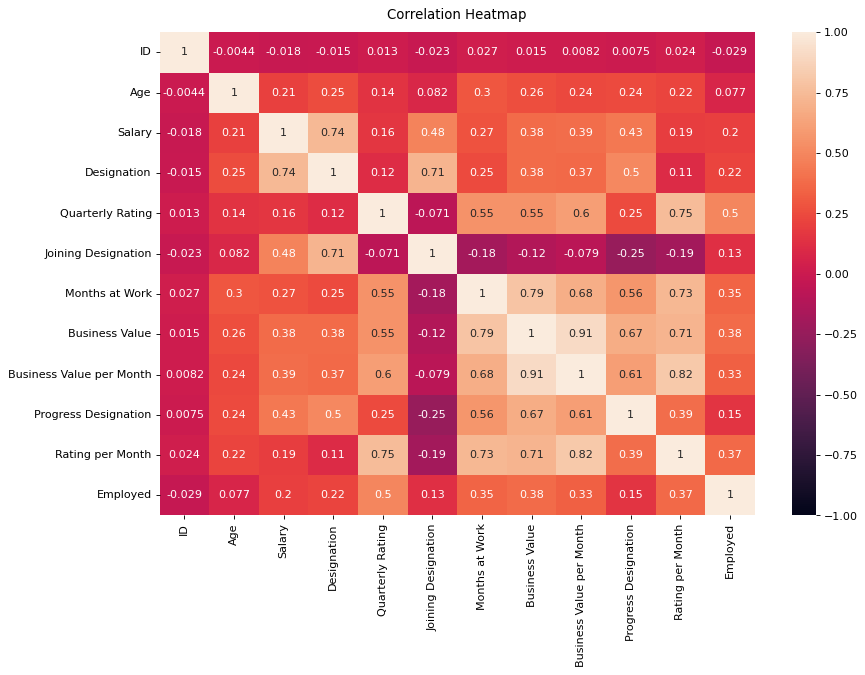

In [891]:
plt.figure(figsize=(12, 8), dpi=80)

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='rocket')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

## Employment and gender structure

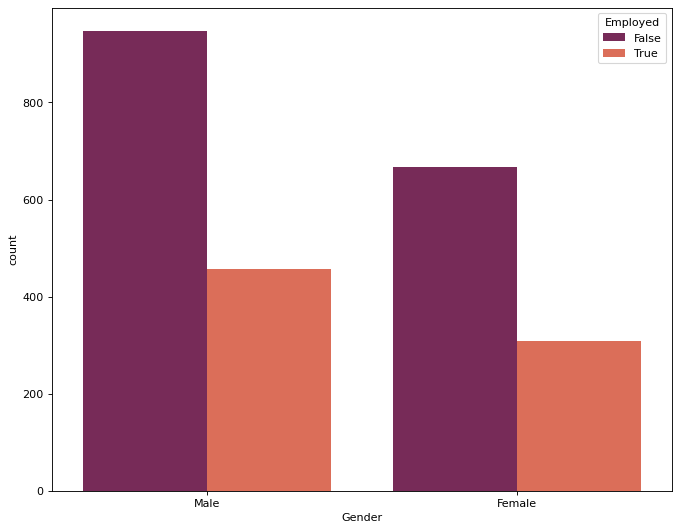

In [892]:
plt.figure(figsize=(10, 8), dpi=80)
sns.countplot(data = df, x='Gender', hue='Employed', palette='rocket')
plt.show()

In [893]:
Xtab = pd.crosstab(df['Gender'],
                   df['Employed'],
                   normalize='index',
                   margins = True,
).style.format('{:.2%}')
print(Xtab)

The proportion of employed men and women is similar, around 32%. Therefore, gender does not matter among people not employed in the enterprise.

## Employment and education level structure

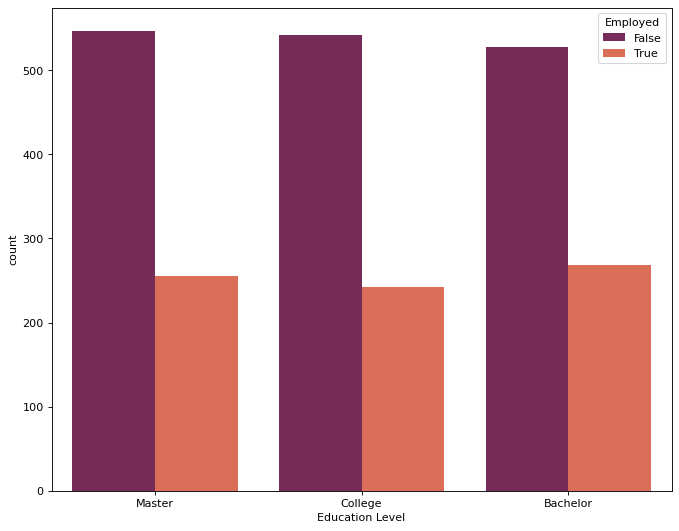

In [894]:
plt.figure(figsize=(10, 8), dpi=80)
sns.countplot(data = df, x='Education Level', hue='Employed', palette='rocket')
plt.show()

In [895]:
Xtab = pd.crosstab(df['Education Level'],df['Employed'])
chi2, pval, dof, expected = chi2_contingency(Xtab)
print("Observed contingency table:")
print(Xtab)
print("\nExpected contingency table (no association):")
print(np.round(expected))

Observed contingency table:
Employed         False  True
Education Level             
Bachelor           527   268
College            542   242
Master             547   255

Expected contingency table (no association):
[[540. 255.]
 [532. 252.]
 [544. 258.]]


In [896]:
print(chi2)

1.5252543618651055


Chi-square statistic is relatively small, which means that there is no association between variables.

## Employment and salary structure

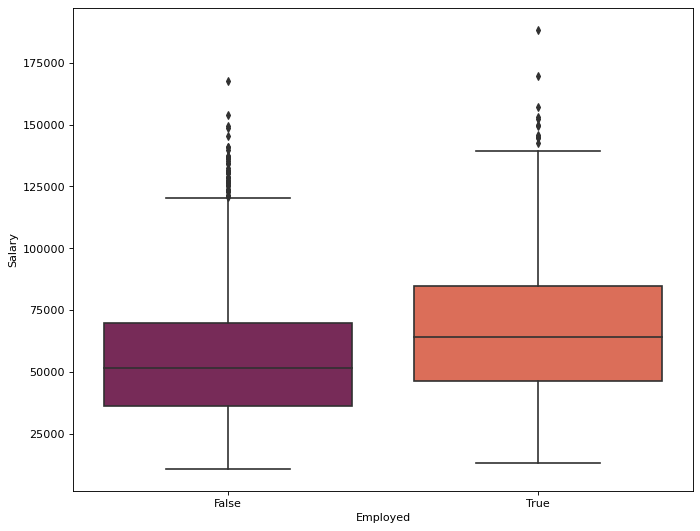

In [897]:
plt.figure(figsize=(10, 8), dpi=80)
sns.boxplot(data = df, x = 'Employed', y = 'Salary', palette='rocket')
plt.show()

In [898]:
employed_salary_mean = np.mean(df['Salary'][df['Employed'] == True])
employed_salary_median = np.median(df['Salary'][df['Employed'] == True])
unemployed_salary_mean = np.mean(df['Salary'][df['Employed'] == False])
unemployed_salary_median = np.median(df['Salary'][df['Employed'] == False])

In [899]:
print('Mean salary of employed: ' + str(employed_salary_mean))
print('Mean salary of unemployed: ' + str(unemployed_salary_mean))
print('Median salary of employed: ' + str(employed_salary_median))
print('Median salary of unemployed: ' + str(unemployed_salary_median))

Mean salary of employed: 67631.90065359477
Mean salary of unemployed: 55391.40099009901
Median salary of employed: 64154.0
Median salary of unemployed: 51630.0


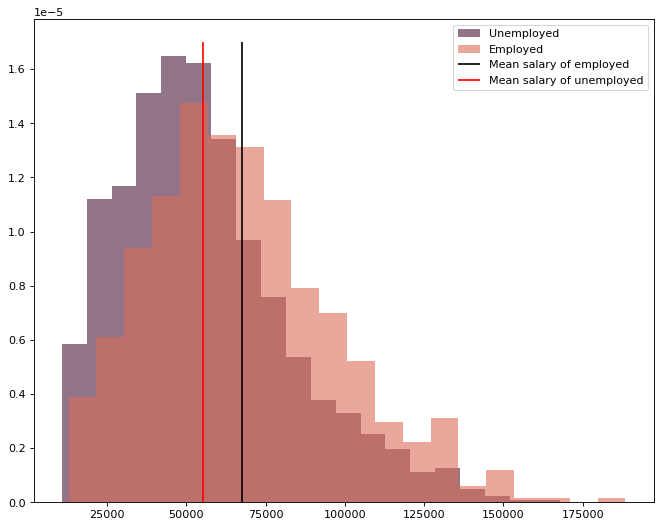

In [900]:
unemployed = df['Salary'][df['Employed'] == False]
employed = df['Salary'][df['Employed'] == True]
plt.figure(figsize=(10, 8), dpi=80)
plt.hist(unemployed , color="#4a1936", label="Unemployed", alpha=0.6, density=True, stacked=True, bins=20)
plt.hist(employed , color="#db6e59", label="Employed", alpha=0.6, density=True, stacked=True, bins=20)
plt.vlines(x = employed_salary_mean, ymin = 0, ymax=0.000017,  colors = 'k', label='Mean salary of employed')
plt.vlines(x = unemployed_salary_mean, ymin = 0, ymax=0.000017 , colors = 'red', label='Mean salary of unemployed')
plt.legend()
plt.show()

People who don't work for a company anymore earned statistically less than people who are still employed.

## Employment and total business value per month structure

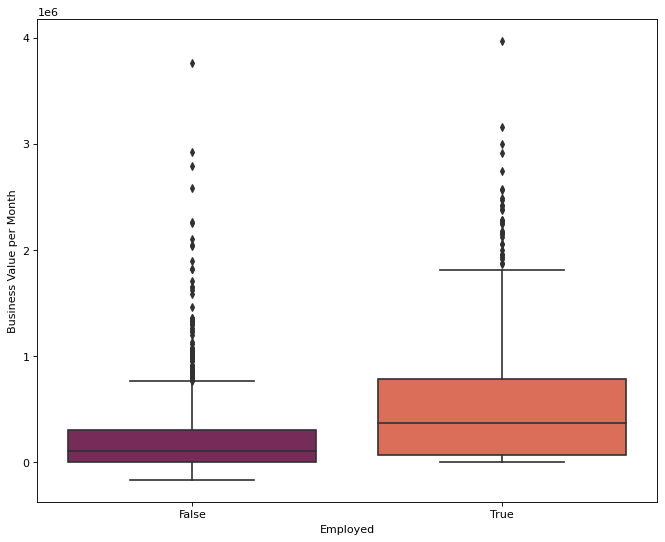

In [901]:
plt.figure(figsize=(10, 8), dpi=80)
sns.boxplot(data = df, x = 'Employed', y = 'Business Value per Month', palette='rocket')
plt.show()

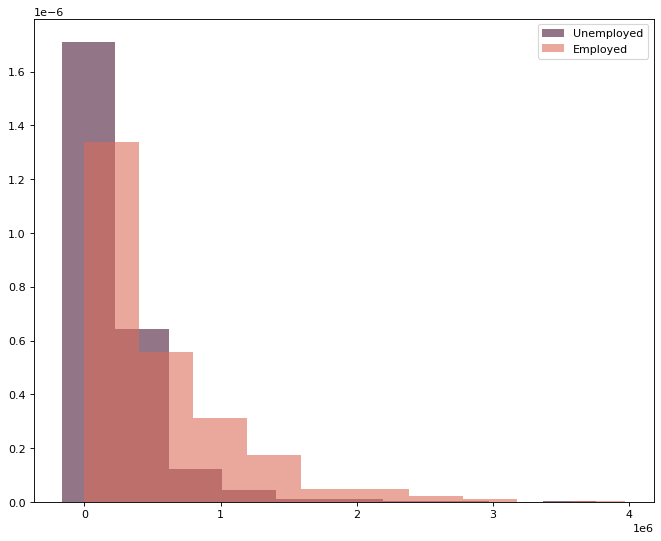

In [902]:
unemployed = df['Business Value per Month'][df['Employed'] == False]
employed = df['Business Value per Month'][df['Employed'] == True]
plt.figure(figsize=(10, 8), dpi=80)
plt.hist(unemployed , color="#4a1936", label="Unemployed", alpha=0.6, density=True, stacked=True)
plt.hist(employed , color="#db6e59", label="Employed", alpha=0.6, density=True, stacked=True)
plt.legend()
plt.show()

People who don't work for a company anymore created statistically less total business value per month than people who are still employed.

## Employment and rating per month structure

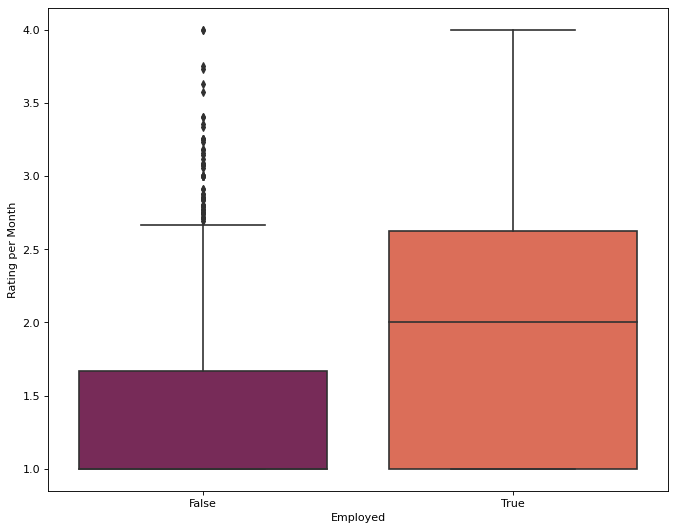

In [903]:
plt.figure(figsize=(10, 8), dpi=80)
sns.boxplot(data = df, x = 'Employed', y = 'Rating per Month', palette='rocket')
plt.show()

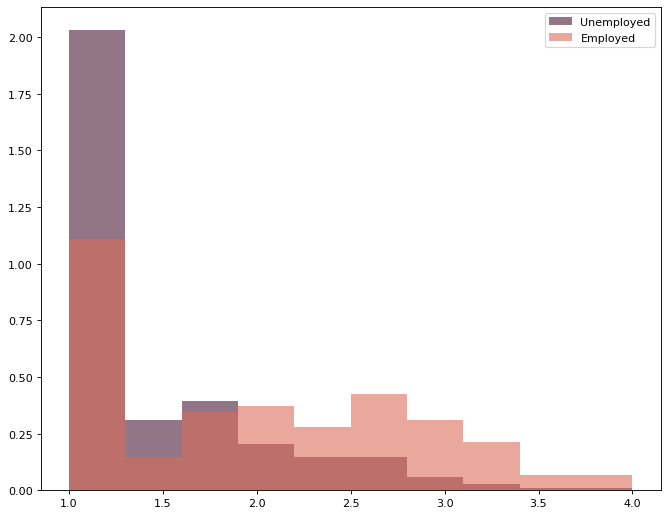

In [904]:
unemployed = df['Rating per Month'][df['Employed'] == False]
employed = df['Rating per Month'][df['Employed'] == True]
plt.figure(figsize=(10, 8), dpi=80)
plt.hist(unemployed , color="#4a1936", label="Unemployed", alpha=0.6, density=True, stacked=True)
plt.hist(employed , color="#db6e59", label="Employed", alpha=0.6, density=True, stacked=True)
plt.legend()
plt.show()

Employed in a company have significantly higher rating per month than unemployed.

## Employment and location structure

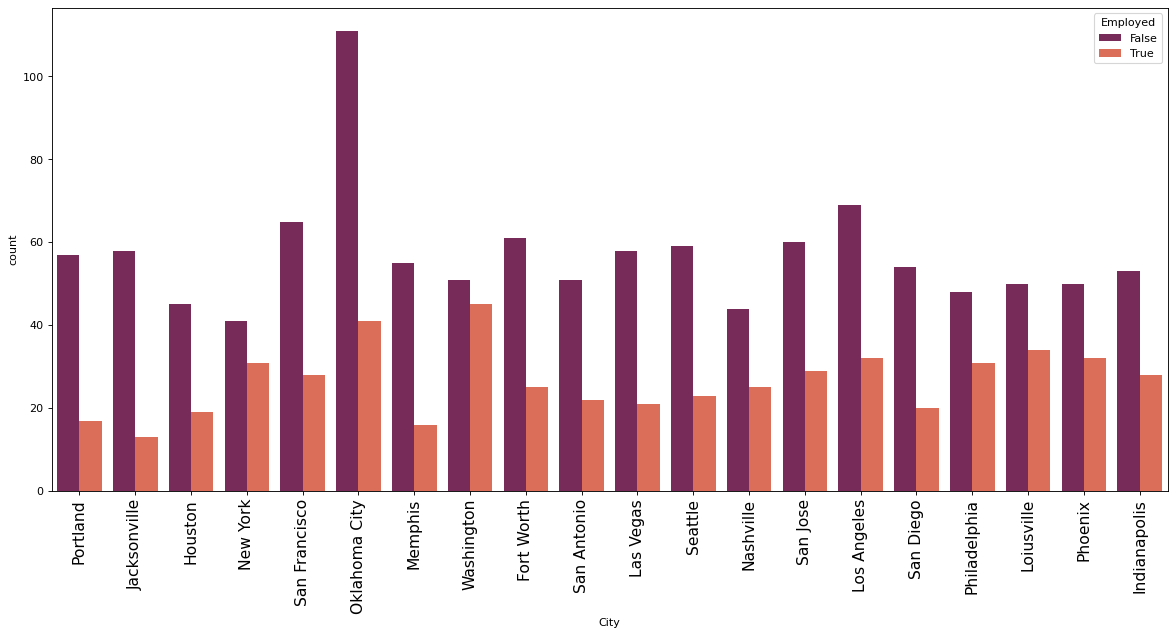

In [905]:
plt.figure(figsize=(18, 8), dpi=80)
sns.countplot(data = df, x='City', hue='Employed', palette='rocket')
plt.xticks(rotation = 90, fontsize=14)
plt.show()

## Unemployment and designation structure

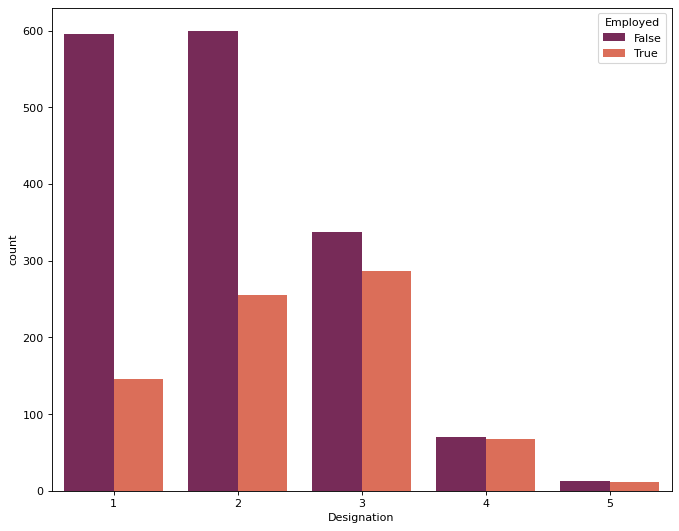

In [906]:
plt.figure(figsize=(10, 8), dpi=80)
sns.countplot(data = df, x='Designation', hue='Employed', palette='rocket')
plt.show()

In [907]:
Xtab = pd.crosstab(df['Designation'],
                   df['Employed'],
                   normalize='index',
                   margins = True,
).style.format('{:.2%}')
Xtab

Employed,False,True
Designation,,
1,80.32%,19.68%
2,70.18%,29.82%
3,54.09%,45.91%
4,51.09%,48.91%
5,54.17%,45.83%
All,67.87%,32.13%


Workers who don't work in company have lower designations thank employed.

## Employment and progress designation structure

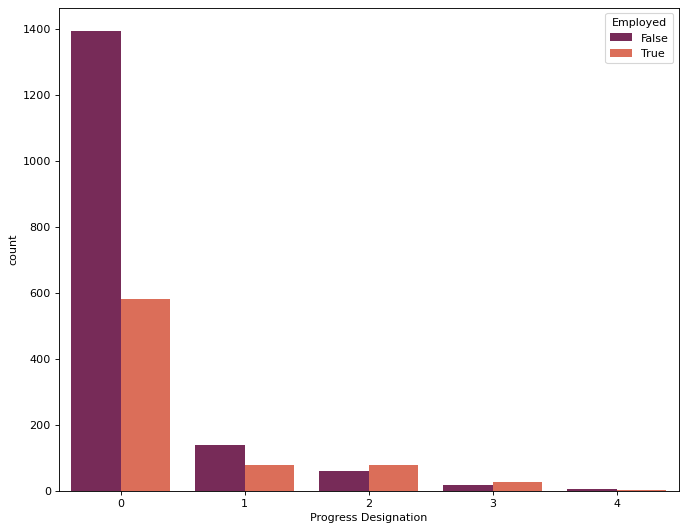

In [908]:
plt.figure(figsize=(10, 8), dpi=80)
sns.countplot(data = df, x='Progress Designation', hue='Employed', palette='rocket')
plt.show()

In [909]:
Xtab = pd.crosstab(df['Progress Designation'],
                   df['Employed'],
                   normalize='index',
                   margins = True,
).style.format('{:.2%}')
Xtab

Employed,False,True
Progress Designation,,
0,70.63%,29.37%
1,64.35%,35.65%
2,43.07%,56.93%
3,40.43%,59.57%
4,66.67%,33.33%
All,67.87%,32.13%


The most employees who don't work in a company didn't make any progress or made maximal progress. Majority of current employers  made a progress by 2 or 3 levels.

## Employment and age structure

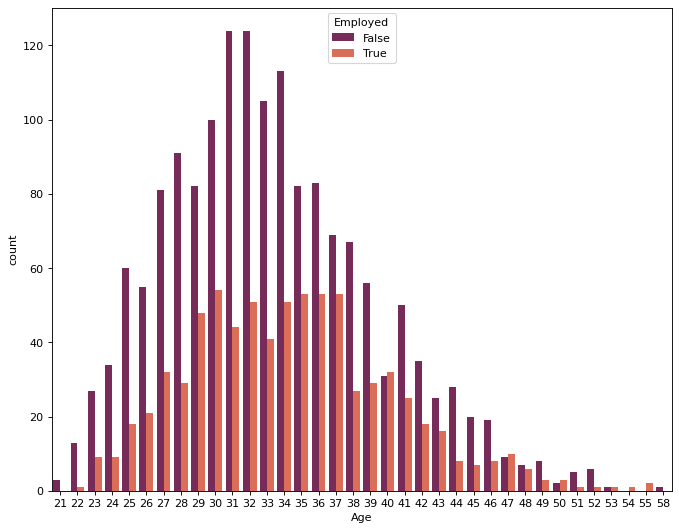

In [910]:
plt.figure(figsize=(10, 8), dpi=80)
sns.countplot(data = df, x='Age', hue='Employed', palette='rocket')
plt.show()

In [911]:
employed_mean_age = np.mean(df['Age'][df['Employed']==True])
unemployed_mean_age = np.mean(df['Age'][df['Employed']==False])
employed_median_age = np.median(df['Age'][df['Employed']==True])
unemployed_median_age = np.median(df['Age'][df['Employed']==False])
print('Mean age of employed: ' + str(employed_mean_age))
print('Mean age of unemployed: ' + str(unemployed_mean_age))
print('Median age of employed: ' + str(employed_median_age))
print('Median age of unemployed: ' + str(unemployed_median_age))

Mean age of employed: 34.316339869281045
Mean age of unemployed: 33.32858910891089
Median age of employed: 34.0
Median age of unemployed: 33.0


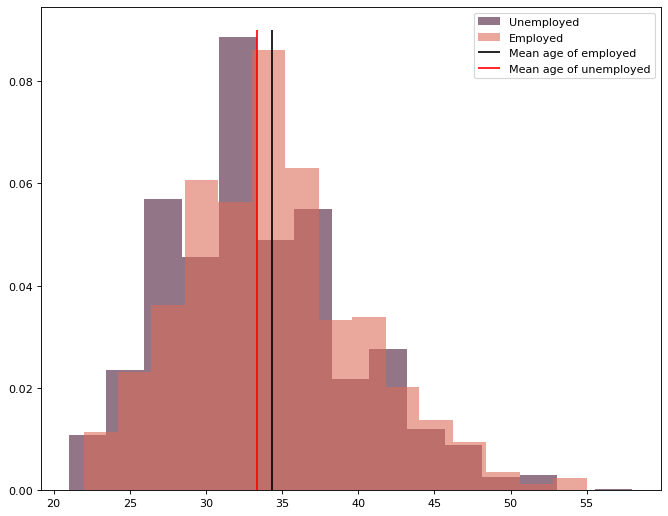

In [912]:
unemployed = df['Age'][df['Employed'] == False]
employed = df['Age'][df['Employed'] == True]
plt.figure(figsize=(10, 8), dpi=80)
plt.hist(unemployed , color="#4a1936", label="Unemployed", alpha=0.6, density=True, stacked=True, bins=15)
plt.hist(employed , color="#db6e59", label="Employed", alpha=0.6, density=True, stacked=True, bins=15)
plt.vlines(x = employed_mean_age, ymin = 0, ymax=0.09,  colors = 'k', label='Mean age of employed')
plt.vlines(x = unemployed_mean_age, ymin = 0, ymax=0.09 , colors = 'red', label='Mean age of unemployed')
plt.legend()
plt.show()

Employees who don't work in a company are statistically younger than those who work.

## Employment and months at work structure

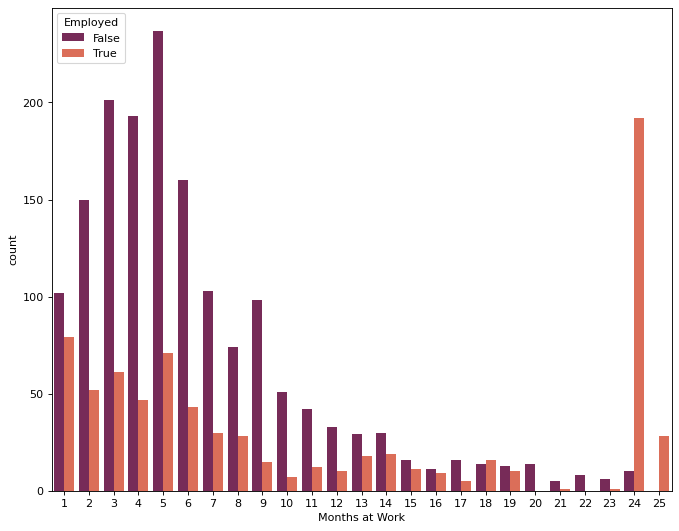

In [913]:
plt.figure(figsize=(10, 8), dpi=80)
sns.countplot(data = df, x='Months at Work', hue='Employed', palette='rocket')
plt.show()

In [914]:
employed_mean_months = np.mean(df['Months at Work'][df['Employed']==True])
unemployed_mean_months = np.mean(df['Months at Work'][df['Employed']==False])
employed_median_months = np.median(df['Months at Work'][df['Employed']==True])
unemployed_median_months = np.median(df['Months at Work'][df['Employed']==False])
print('Mean months at work of employed: ' + str(employed_mean_months))
print('Mean months at work of unemployed: ' + str(unemployed_mean_months))
print('Median months at work of employed: ' + str(employed_median_months))
print('Median months at work of unemployed: ' + str(unemployed_median_months))

Mean months at work of employed: 11.479738562091503
Mean months at work of unemployed: 6.4405940594059405
Median months at work of employed: 7.0
Median months at work of unemployed: 5.0


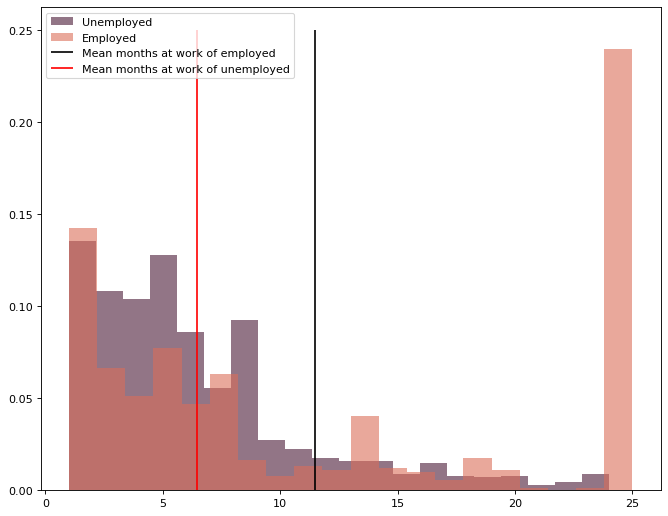

In [915]:
unemployed = df['Months at Work'][df['Employed'] == False]
employed = df['Months at Work'][df['Employed'] == True]
plt.figure(figsize=(10, 8), dpi=80)
plt.hist(unemployed , color="#4a1936", label="Unemployed", alpha=0.6, density=True, stacked=True, bins=20)
plt.hist(employed , color="#db6e59", label="Employed", alpha=0.6, density=True, stacked=True, bins=20)
plt.vlines(x = employed_mean_months, ymin = 0, ymax=0.25,  colors = 'k', label='Mean months at work of employed')
plt.vlines(x = unemployed_mean_months, ymin = 0, ymax=0.25 , colors = 'red', label='Mean months at work of unemployed')
plt.legend()
plt.show()

Unemployed worked less time than those who are employed.

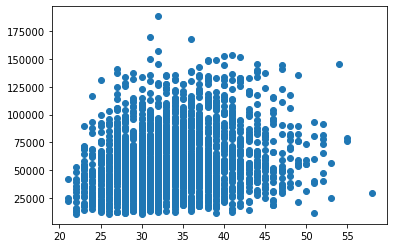

In [922]:
plt.scatter(df['Age'], df['Salary'])
plt.xlabel='Age'
plt.ylabel='Salary'
plt.show()

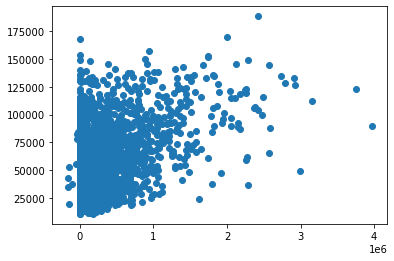

In [923]:
plt.scatter(df['Business Value per Month'], df['Salary'])
plt.xlabel='Business Value per Month'
plt.ylabel='Salary'
plt.show()

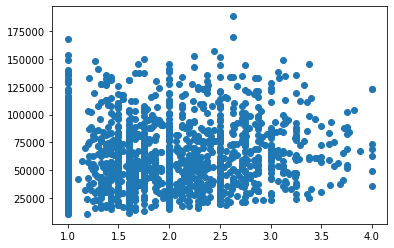

In [924]:
plt.scatter(df['Rating per Month'], df['Salary'])
plt.xlabel='Rating per Month'
plt.ylabel='Salary'
plt.show()

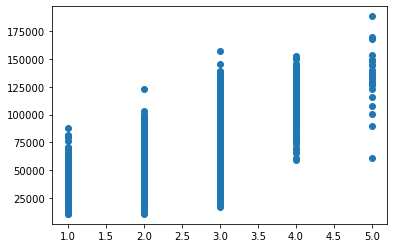

In [926]:
plt.scatter(df['Designation'], df['Salary'])
plt.xlabel='Designation'
plt.ylabel='Salary'
plt.show()

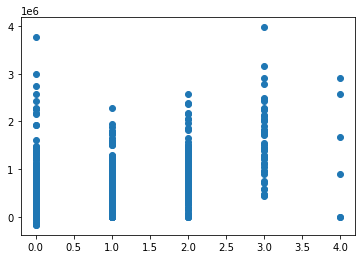

In [927]:
plt.scatter(df['Progress Designation'], df['Business Value per Month'])
plt.xlabel='Progress Designation'
plt.ylabel='Business Value per Month'
plt.show()

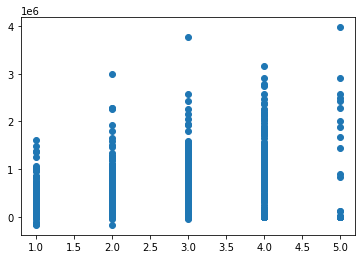

In [928]:
plt.scatter(df['Designation'], df['Business Value per Month'])
plt.xlabel='Designation'
plt.ylabel='Business Value per Month'
plt.show()

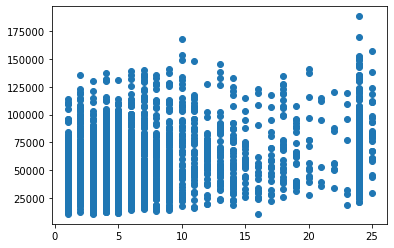

In [929]:
plt.scatter(df['Months at Work'], df['Salary'])
plt.xlabel='Months at Work'
plt.ylabel='Salary'
plt.show()

## Conclusions